# 1. Importing the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 2. Loading the Dataset

In [2]:
data = pd.read_csv("dermatology.csv", delimiter=",")

In [3]:
data.head()

,2,2.1,0,3,0.1,0.2,0.3,0.4,1,0.5,...,0.19,0.20,3.2,0.21,0.22,0.23,1.1,0.24,55,2.3
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


In [4]:
#Rename the columns in human readable form. The details of the column names can be found in description
data.columns = ['erythema','scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules','follicular papules','oral mucosal involvement','knee and elbow involvement',
              'scalp involvement','family history(0 or 1)','melanin incontinence', 'eosinophils in the infiltrate','PNL infiltrate','fibrosis of the papillary dermis','exocytosis','acanthosis',
              'hyperkeratosis','parakeratosis','dlubbing of the rete ridges',
              'elongation of the rete ridges','thinning of the suprapapillary epidermis','spongiform pustule','munro microabcess','focal hypergranulosis','disappearance of the granular layer',
              'vacuolisation and damage of basal layer','spongiosis','saw-tooth appearance of retes',
              'follicular horn plug','perifollicular parakeratosis','inflammatory monoluclear inflitrate','band-like infiltrate','Age (linear)', 'Classcode']

In [5]:
data.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),Classcode
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


In [6]:
'''As we know the ClassCode is our target value, so we are going to save it'''
y=data['Classcode']
del data['Classcode']

In [7]:
#Print the y_train
y

0      1
1      3
2      1
3      3
4      2
      ..
360    4
361    4
362    3
363    3
364    1
Name: Classcode, Length: 365, dtype: int64

# 3. Structure of the Dataset

In [8]:
#Print the Describe function for the Dataframe
data.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.068493,1.794521,1.553425,1.361644,0.635616,0.449315,0.167123,0.378082,0.613699,0.520548,...,0.364384,0.394521,0.465753,0.457534,0.947945,0.454795,0.104110,0.115068,1.868493,0.556164
std,0.665656,0.702408,0.905126,1.136632,0.908653,0.958353,0.571304,0.835057,0.984120,0.906472,...,0.760525,0.850322,0.865743,0.955884,1.126615,0.955758,0.451018,0.489357,0.725682,1.107044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [9]:
#Print the shape of the Dataframe
data.shape

(365, 34)

In [10]:
#Print the shape of the y_train
y.shape

(365,)

## Missing or Null Points

In [11]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history(0 or 1)                      0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
dlubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

In [12]:
data.isna().sum()

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history(0 or 1)                      0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
dlubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

However, there are no missing values in this dataset as shown above. So we will proceed further

# 4. Exploration of the Dataset

## Statistics

For our very first coding implementation, we will calculate descriptive statistics about the Dermatology Dataset. Since numpy has already been imported for us, using this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, we will need to implement the following:

 * Calculate the minimum, maximum, mean, median, and Unique of 'ClassCode'. Store each calculation in their respective variable.
 * Store each calculation in their respective variable.

In [13]:
#Mininum of the 'ClassCode'
min_class=y.min()

#Maximum of the 'ClassCode'
max_class=y.max()

#Mean of the 'ClassCode'
mean_class=y.mean()

#Median of the 'ClassCode'
median_class=y.median()

#Unique of the 'ClassCode'
unique_class=y.unique()

print('The minimum value of the ClassCode is: ',min_class)
print('The maximum value of the ClassCode is: ',max_class)
print('The median  value of the ClassCode is: ',median_class)
print('The unique  value of the ClassCode is: ',unique_class)

The minimum value of the ClassCode is:  1
The maximum value of the ClassCode is:  6
The median  value of the ClassCode is:  3.0
The unique  value of the ClassCode is:  [1 3 2 5 4 6]


Let's analysis the 'ClassCode' in graphical Format

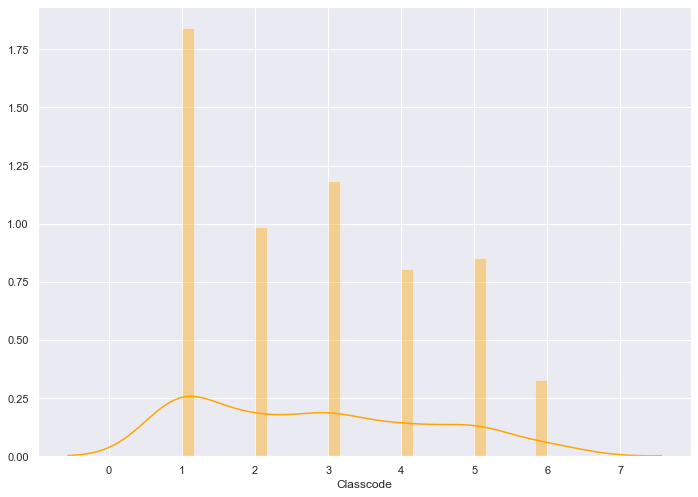

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(y, bins=30,color='orange')
plt.show()

From above we can see that, ClassCode with value '1' is more in number.

In [15]:
y.value_counts(ascending=False)

1    112
3     72
2     60
5     52
4     49
6     20
Name: Classcode, dtype: int64

Below is the information to understand what class code means.

Class Distribution:

Database:  Dermatology




     Class code:                      Class:                         Number of instances:
                                        
     1                                psoriasis                      112
 
         
     2                                seboreic dermatitis             61
 
 
     3                                lichen planus                   72
 
 
     4                                pityriasis rosea                49
 
 
     5                                cronic dermatitis               52    
 
 
     6                                pityriasis rubra pilaris        20

### Data Cleaning
Some part of the data has issues. Like the Age column. It has question marks against some values. Data cleaning is needed

In [16]:
data['Age (linear)'].unique()

array(['8', '26', '40', '45', '41', '18', '57', '22', '30', '20', '21',
       '10', '65', '38', '23', '17', '51', '42', '44', '33', '43', '50',
       '34', '?', '15', '46', '62', '35', '48', '12', '52', '60', '32',
       '19', '29', '25', '36', '13', '27', '31', '55', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [17]:
'''There is "?" in the Age(linear) Feature, trying to avoid''';

In [18]:
#Dataframe with "?" in Age(linear)
data[data['Age (linear)'] == '?']

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear)
32,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,?
33,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,?
34,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,?
35,2,1,2,3,2,3,0,2,0,0,...,1,0,2,0,2,0,0,0,3,?
261,2,1,0,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,?
262,1,1,1,3,0,0,0,0,0,0,...,0,0,0,3,0,0,0,2,0,?
263,1,1,0,2,0,0,0,0,1,0,...,0,0,0,2,0,0,0,3,0,?
264,1,1,0,3,0,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,?


In [19]:
#Replacing "?" with nan
data= data.replace('?', np.nan)

In [20]:
data[data.values == '?']

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear)


In [21]:
data[data['Age (linear)'].isna()]

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear)
32,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
33,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
34,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
35,2,1,2,3,2,3,0,2,0,0,...,1,0,2,0,2,0,0,0,3,NaN
261,2,1,0,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,NaN
262,1,1,1,3,0,0,0,0,0,0,...,0,0,0,3,0,0,0,2,0,NaN
263,1,1,0,2,0,0,0,0,1,0,...,0,0,0,2,0,0,0,3,0,NaN
264,1,1,0,3,0,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,NaN


In [22]:
data['Age (linear)'] = pd.to_numeric(data['Age (linear)'], errors='coerce')

In [23]:
data['Age (linear)'].fillna(data['Age (linear)'].mean(),inplace=True)

In [24]:
data.dtypes

erythema                                      int64
scaling                                       int64
definite borders                              int64
itching                                       int64
koebner phenomenon                            int64
polygonal papules                             int64
follicular papules                            int64
oral mucosal involvement                      int64
knee and elbow involvement                    int64
scalp involvement                             int64
family history(0 or 1)                        int64
melanin incontinence                          int64
eosinophils in the infiltrate                 int64
PNL infiltrate                                int64
fibrosis of the papillary dermis              int64
exocytosis                                    int64
acanthosis                                    int64
hyperkeratosis                                int64
parakeratosis                                 int64
dlubbing of 

In [25]:
#Here we will create new dataframe with EP for correlation
correlation_df=data.copy()
correlation_df['Age (linear)']=y
correlation_df.head()


,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear)
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,3
2,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,1
3,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,2


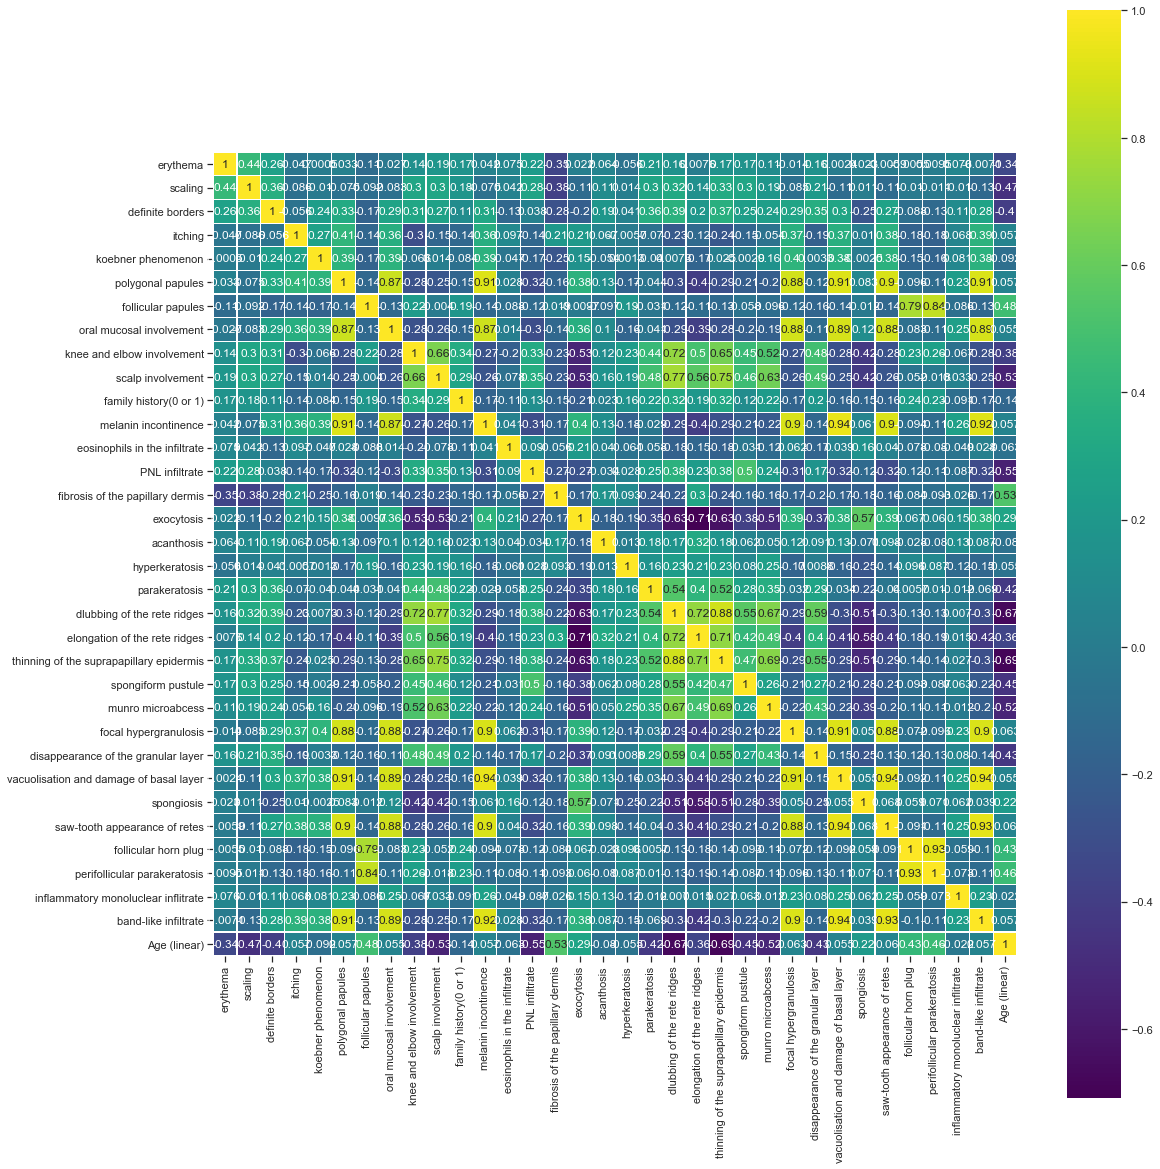

In [26]:
#Using the seaborn library for the heat map
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(18, 20))
sns.heatmap(correlation_df.astype(float).corr(), linewidths=0.1, square=True, linecolor='white', annot=True,cmap='viridis')
plt.show()

As we've noticed it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

# 5. Principal Component Analysis

In [27]:
#The Class code column is the value that needs to be predicted from the analysis. 
#Hence we will have to split X and y(Features and labels) based on this information
X = data.iloc[:,0:34]  # all rows, all the features and no labels
y=y # all rows, label only

In [28]:
scaled_data = StandardScaler().fit_transform(X)

In [29]:
#printing the scaled_data
print(scaled_data)

[[ 1.40130251  1.71856645  1.60039684 ... -1.19843846 -0.50307665
  -1.86748224]
 [-0.10303695 -1.13269152  0.4940619  ...  0.18146702  2.21056341
  -0.67731653]
 [-0.10303695  0.29293746  0.4940619  ...  1.56137251 -0.50307665
   0.24836791]
 ...
 [ 1.40130251  0.29293746  0.4940619  ...  0.18146702  2.21056341
  -0.54507589]
 [-0.10303695 -1.13269152  1.60039684 ...  0.18146702  2.21056341
   0.90957109]
 [ 1.40130251  0.29293746  0.4940619  ...  1.56137251 -0.50307665
  -0.08223367]]


## The Algebra for PCA

 * Calculating the covarience matrix
 * Calculating the eigen values and eigen vectors
 * Forming Principal Components
 * Projection into the new features space

### a). Calculating the covarience matrix

 * Covarience matrix is a matrix of variances and covariances(or correlations) among every pair of the m variable.
 * It is square, symmetric matrix.
 * Covarience matrix (S) = X.T* X, we can find it by using numpy matmul() function in python.

In [30]:
#Find the covarience matrix which is : X.T*X
sample_data=scaled_data

In [31]:
#Matrix multiplication using numpy
covar_matrix=np.matmul(sample_data.T,sample_data)

In [32]:
print("The shape of variance matrix is : ",covar_matrix.shape)

The shape of variance matrix is :  (34, 34)


### b). Calculating the eigen values and eigen vectors

 * ƛ is an eigenvalue for a matrix X if it is a solution of the characteristic equation:
    det( ƛ*I - A ) = 0
    Where, I is the identity matrix of the same dimension as X
 * The sum of all m eigenvalues equals the trace of S (the sum of the variances of
    the original variables).
 * For each eigenvalue ƛ, a corresponding eigen-vector v, can be found by solving :
    ( ƛ*I - A )v = 0
 * The eigenvalues,  ƛ1, ƛ2, ... ƛm are the variances of the coordinates
    on each principal component axis.

In [33]:
#Finding top two eigen value and corresponding eigen vectors
#for projecting onto a 2-Dimension space.

from scipy.linalg import eigh

#The parameter 'eigvals' is defined(low value to high value)
#eigh function will return the eigen value in ascending order
#this code generates only top two eigen values 

values,vectors=eigh(covar_matrix,eigvals=(32,33))

print("The shape of eigen vectors = ",vectors.shape)
#converting the eigen vectors into (2,d) shape for easyness of further computations
vectors=vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
#here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
#here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

The shape of eigen vectors =  (34, 2)
Updated shape of eigen vectors =  (2, 34)


### c). Forming Principal Components

In [34]:
#projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication
new_coordinates=np.matmul(vectors,sample_data.T)

print("Resultant new data points shape ",vectors.shape,"X",sample_data.T.shape," = ",new_coordinates.shape)

Resultant new data points shape  (2, 34) X (34, 365)  =  (2, 365)


### d). Projection into the new features space

In [35]:
new_coordinates.T.shape,y.shape

((365, 2), (365,))

In [36]:
#Creating the Dataframe having 1st principal & 2nd principal

#creating new_dataframe for plotting labeled points
df=pd.DataFrame(data=new_coordinates.T,columns=['1st principal','2nd principal'])
df['target']=y
df.head()

,1st principal,2nd principal,target
0,-1.967773,-3.175427,1
1,-2.085009,5.234603,3
2,-2.839477,-4.464604,1
3,-2.892076,4.770307,3
4,1.391574,-0.185524,2


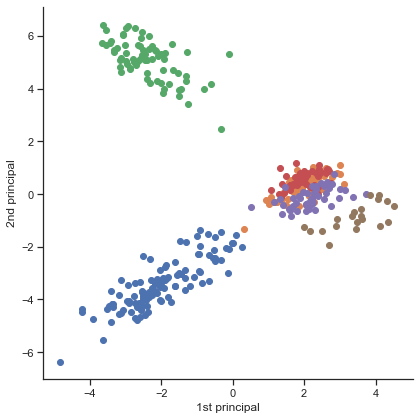

In [37]:
# ploting the 2d data points with seaborn
sns.FacetGrid(df, hue="target", height=6).map(plt.scatter, '1st principal', '2nd principal')
plt.show()

# 6. Machine learning Model 

In [38]:
'''Here we are using Random Forest Classifier, for the prediction''';

## Splitting the Data

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['1st principal','2nd principal']], y, test_size=0.3, random_state=1)

In [40]:
#print the shape of training data
X_train.shape,y_train.shape

((255, 2), (255,))

In [41]:
#print the shape of testing data
X_test.shape,y_test.shape

((110, 2), (110,))

## Importing library for the Classifier Model

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
clf=RandomForestRegressor()
clf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
#Training model on different estimators to get best estimator with maximum score
estimators = np.arange(10, 300, 10)
scores = []
for n in estimators:
    clf.set_params(n_estimators=n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
       
print(scores)

[0.6633619030960294, 0.6470648941752668, 0.6423038501156395, 0.6504945775756515, 0.6390337589644919, 0.6650358579674656, 0.6611378166799342, 0.6638236837502187, 0.6569259539990109, 0.6584043029560959, 0.665889929556188, 0.6609661487182479, 0.6614583102612058, 0.6668270250202584, 0.6661519133966921, 0.658266231743047, 0.6669084797178089, 0.6707484932311473, 0.660523636314302, 0.6602307416477173, 0.6557677404820013, 0.6540862181372938, 0.6595428286875644, 0.6688017887683906, 0.6633929963267449, 0.663571617091349, 0.6621448460815131, 0.6625370493658369, 0.6669200209567518]


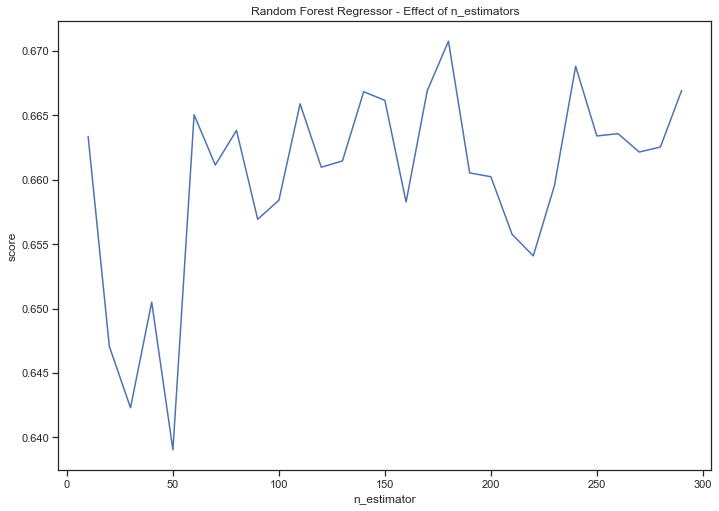

In [45]:
#Graph of estimators with their scores 
plt.title("Random Forest Regressor - Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)